In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'training_data',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2841 files belonging to 4 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'validation_data',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 283 files belonging to 4 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Program Files\anaconda3\envs\FinalYear1.0\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [14]:
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 127, 127, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      27,649,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           6,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,367,728 (123.47 MB)

 Trainable params: 32,367,728 (123.47 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 835s 9s/step - accuracy: 0.6696 - loss: 1.1812 - val_accuracy: 0.7385 - val_loss: 1.0303
Epoch 2/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 819s 9s/step - accuracy: 0.9447 - loss: 0.1535 - val_accuracy: 0.7668 - val_loss: 0.6817
Epoch 3/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 942s 11s/step - accuracy: 0.9811 - loss: 0.0675 - val_accuracy: 0.6042 - val_loss: 0.9775
Epoch 4/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 935s 10s/step - accuracy: 0.9918 - loss: 0.0308 - val_accuracy: 0.5512 - val_loss: 1.6822
Epoch 5/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 929s 10s/step - accuracy: 0.9913 - loss: 0.0292 - val_accuracy: 0.5477 - val_loss: 2.6256
Epoch 6/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 912s 10s/step - accuracy: 0.9981 - loss: 0.0080 - val_accuracy: 0.5583 - val_loss: 2.9569
Epoch 7/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 907s 10s/step - accuracy: 0.9978 - loss: 0.0080 - val_accuracy: 0.7774 - val_loss: 1.8508
Epoch 8/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 804s 9s/step - accuracy: 1.0000 - loss: 3.7020e-04 - val_accuracy: 0

In [18]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

89/89 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 1.0000 - loss: 2.0215e-05
Training accuracy: 1.0


In [19]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 464ms/step - accuracy: 0.7061 - loss: 3.0524
Validation accuracy: 0.7208480834960938


In [20]:
cnn.save('trained_face_model_og.keras')

In [21]:
training_history.history #Return Dictionary of history

{'accuracy': [0.7736712694168091,
  0.9496656060218811,
  0.981696605682373,
  0.9873284101486206,
  0.9936642050743103,
  0.9964801073074341,
  0.9985920190811157,
  1.0,
  1.0,
  0.9809926152229309,
  0.9676170349121094,
  0.9936642050743103,
  0.9996480345726013,
  1.0,
  1.0],
 'loss': [0.6855471134185791,
  0.1332005262374878,
  0.06315130740404129,
  0.049358151853084564,
  0.025477487593889236,
  0.013227955438196659,
  0.005926963873207569,
  0.00033986871130764484,
  0.0007600858225487173,
  0.05951261892914772,
  0.11228316277265549,
  0.017720848321914673,
  0.0016460795886814594,
  0.0001613362255739048,
  5.67508177482523e-05],
 'val_accuracy': [0.7385159134864807,
  0.7667844295501709,
  0.6042402982711792,
  0.5512367486953735,
  0.547703206539154,
  0.5583038926124573,
  0.7773851752281189,
  0.7773851752281189,
  0.8056536912918091,
  0.7279151678085327,
  0.5689045786857605,
  0.7385159134864807,
  0.685512363910675,
  0.7279151678085327,
  0.7208480834960938],
 'val_

In [22]:
import json
with open('training_hist(2).json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


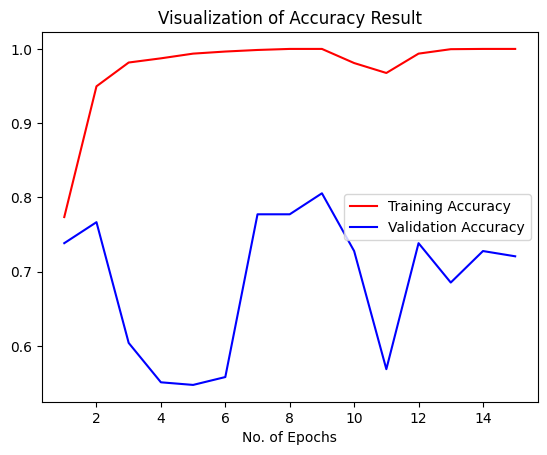

In [25]:
epochs = [i for i in range(1,16)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [26]:
class_name = validation_set.class_names

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'validation_data',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 283 files belonging to 4 classes.


In [28]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

283/283 ━━━━━━━━━━━━━━━━━━━━ 59s 209ms/step


In [29]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [30]:
Y_true


<tf.Tensor: shape=(283,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=i

In [31]:
predicted_categories

<tf.Tensor: shape=(283,), dtype=int64, numpy=
array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 0, 1,
       1, 1, 0, 1, 1, 3, 0, 1, 1, 3, 0, 3, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1,
       1, 0, 1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 3, 3, 1, 0, 1, 0, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 0, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 0, 3, 3, 3, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=i

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [33]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

      ANIKET       0.79      0.56      0.65        79
       ARJUN       0.92      0.53      0.67        93
       OMKAR       1.00      1.00      1.00        45
      POORVA       0.51      1.00      0.68        66

    accuracy                           0.72       283
   macro avg       0.81      0.77      0.75       283
weighted avg       0.80      0.72      0.72       283



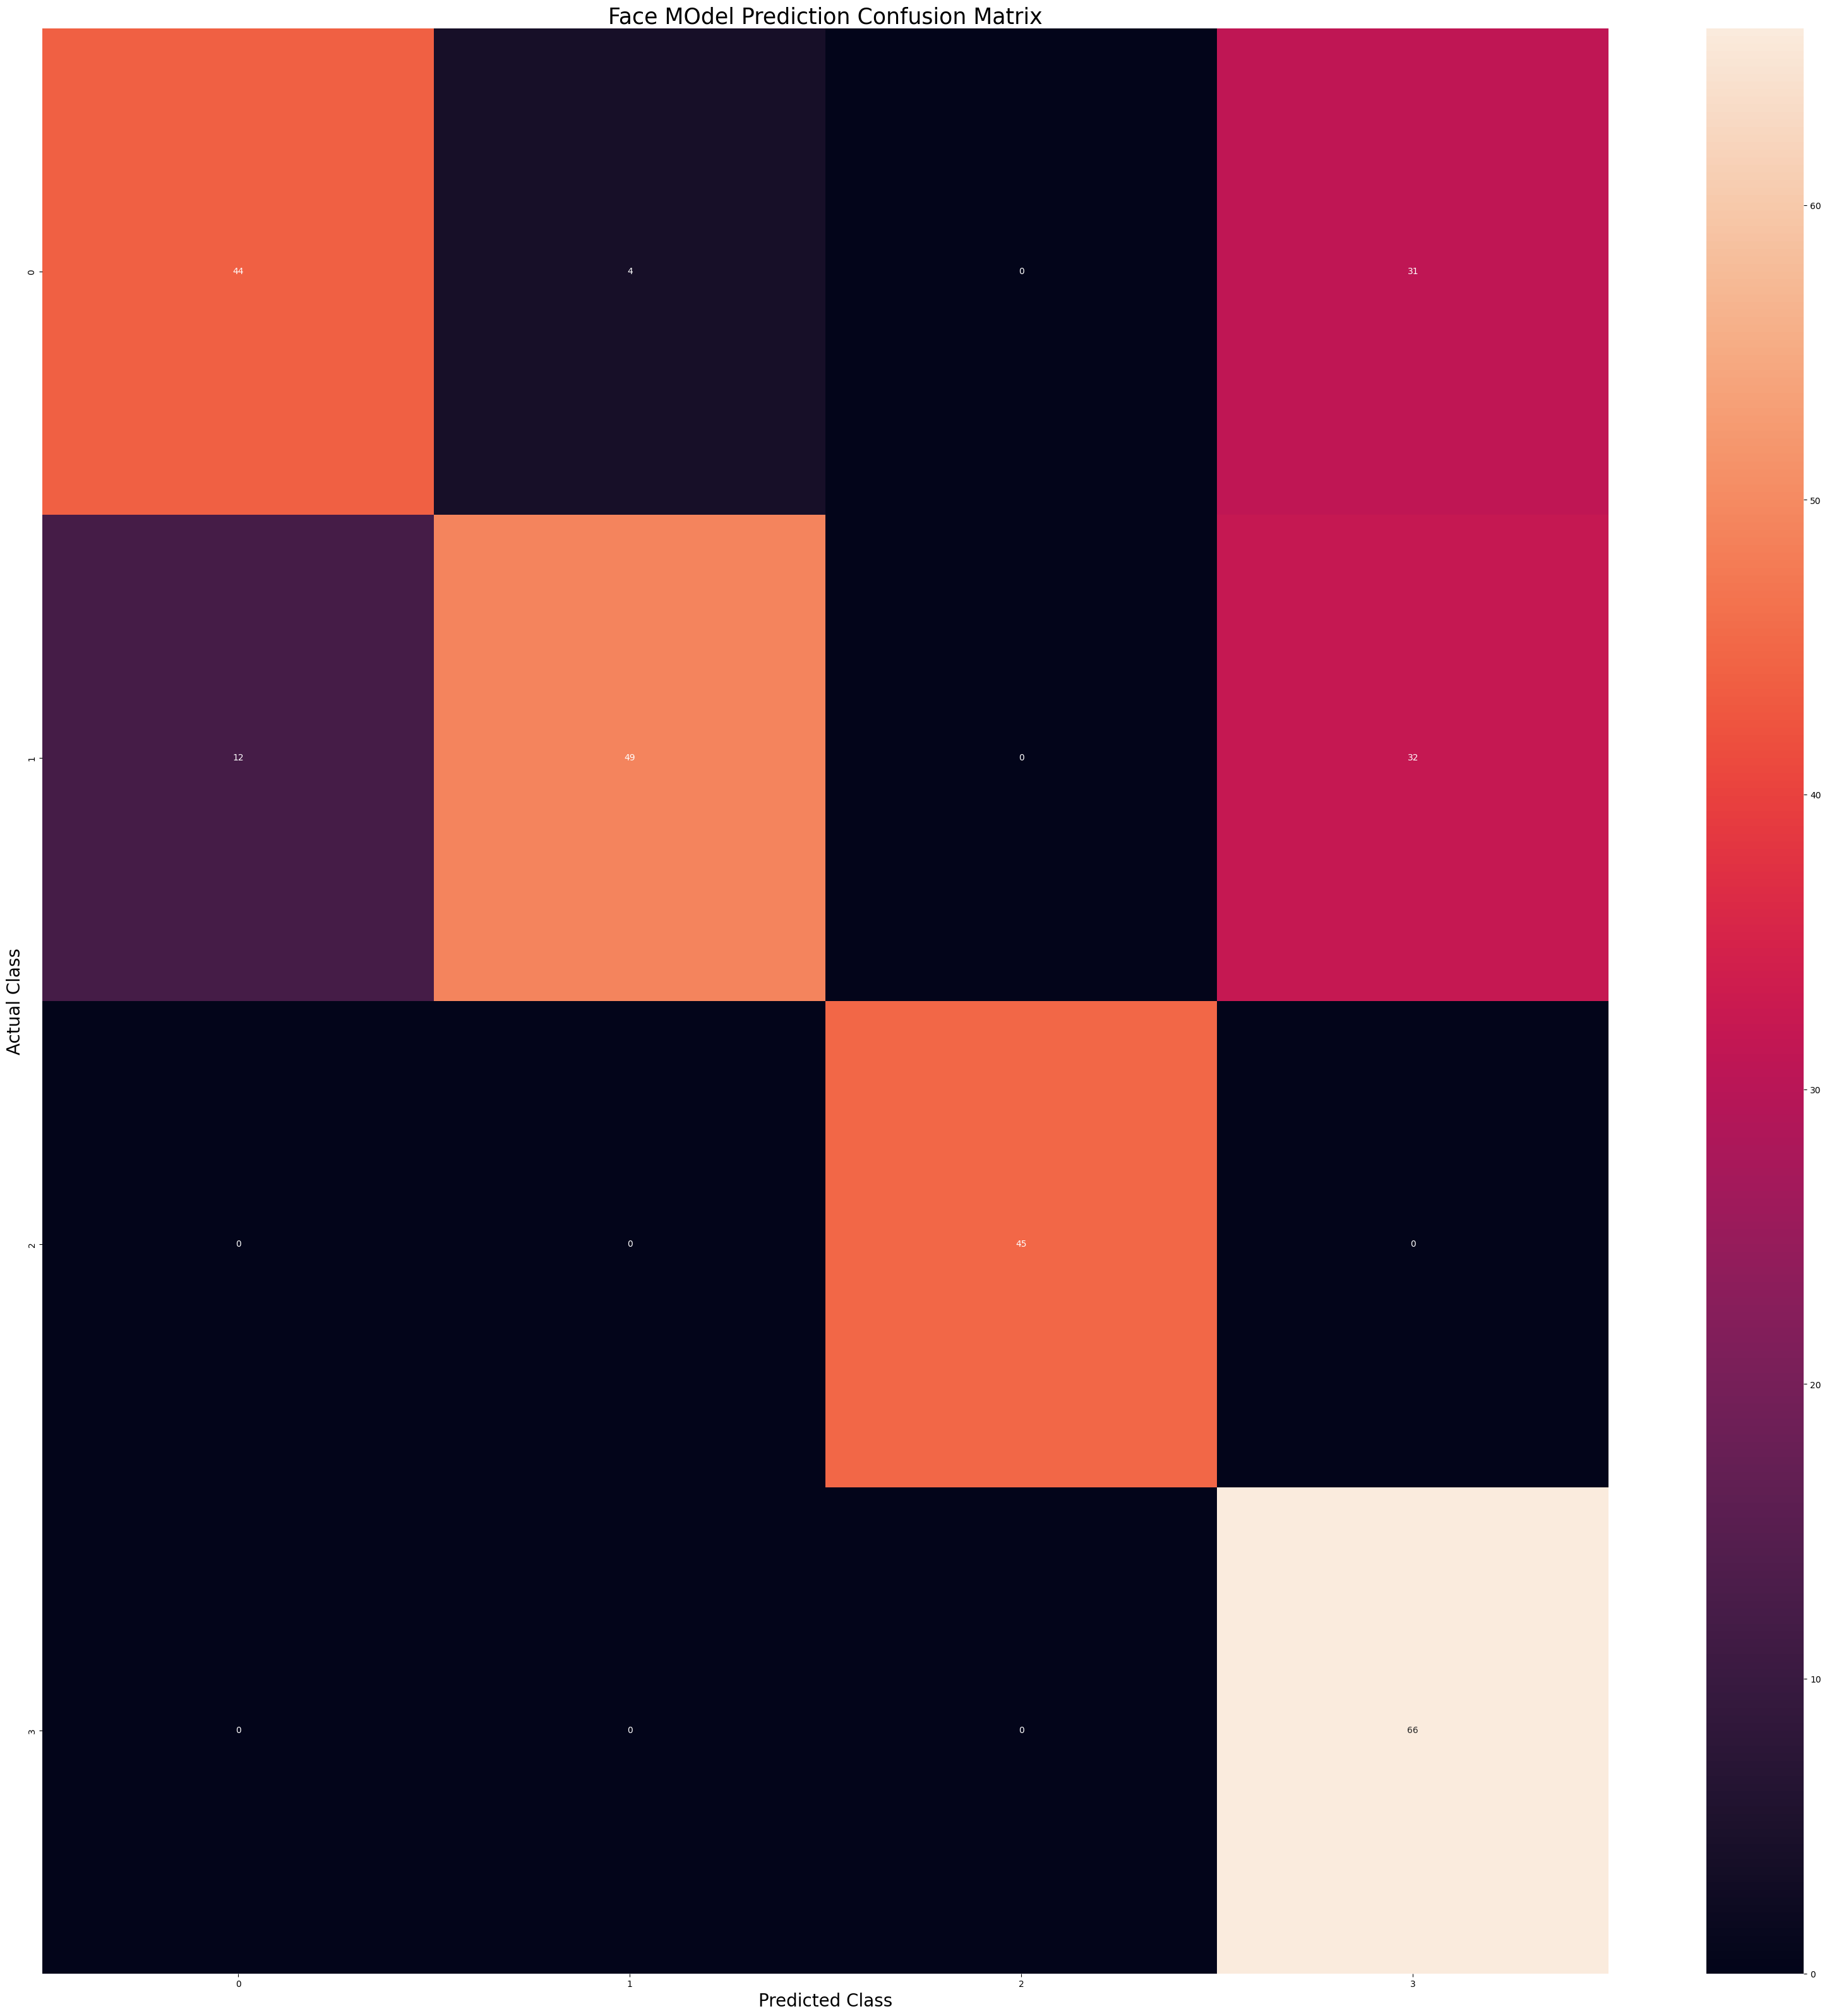

In [34]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Face MOdel Prediction Confusion Matrix',fontsize = 25)
plt.show()